# **Entrega final**
---
*Profesor: Gustavo Benitez*

*Tutor: Yamil Salomón*

*Alumno: Salvador Guagliardi*

---
# **Abstract**
**Bank Marketing** es un dataset (donado en 2012) sobre una campaña de marketing directa (llamadas telefónicas) de una institución bancaria situada en Portugal. El **objetivo** es predecir si el cliente se suscribirá a un depósito a plazo fijo (variable Y). Era común que se intente contactar más de una vez con el mismo cliente para acceder al producto previamente mencionado (depósito a plazo fijo). Es un análisis supervisado de clasificación (se suscribe o no se suscribe) y bivariado (solo dos resultados, sí o no).

Link:https://archive.ics.uci.edu/dataset/222/bank+marketing

La variable objetivo, influirá sobre la toma de decisiones de gerentes y gente encargada de diseñar estrategias de retención y fidelización de nuevos clientes. Se buscará identificar patrones en los clientes que aceptaron la oferta y, en base a ello, optimizar futuras campañas. Ya que si es una estrategia viable podrán optar por realizarla nuevamente, o descartarla e innovar con algo completamente distinto.

Por lo tanto este proyecto estará dirigido para el equipo de marketing de la empresa, data scientists y data analysts, gerentes encargados de la planificación de estrategias comerciales, y gerentes que mantengan relaciones con altos cargos de la empresa.

---
# **Descripción breve de columnas**

**Unknown** son valores desconocidos, podría decirse nulos, que vienen a llenar el vacío que habría en caso de eliminar nulos.

**age**, edad

**job**, trabajo u ocupación

**marital**, es el estado civil: casado, divorciado (incluye viudo/as), soltero

**education**, es el nivel de educación

**default**, si tiene credito en default o no (está atrasado con un pago/debe algo, sí o no)

**balance**, es el promedio del balance anual

**housing**, si tiene un préstamo hipotecario sobre su casa

**loan**, si tiene algún préstamo personal (no hipotecario)

**contact**, como se le contactó (ejemplo, vía teléfono)

**day**, último día que se le contactó

**month**, último mes que se le contactó

**duration**, 	duración del último contacto, en segundos (numerica). Nota importante: este atributo afecta fuertemente el resultado de la variable objetivo (ejemplo, si duration=0 entonces y='no'). Sin embargo, la duración no se sabe antes de realizar la llamada. Así, después de finalizar la llamada recién se sabría si hay "Y". De este modo, esta feature/columna/variable solo debería incluirse para realizar comparaciones y debería de descartarse si la intención es tener un modelo predictivo realista.

**campaign**, cantidad de veces que se llamó al mismo cliente durante dicha campaña

**pdays**, cantidad de días pasaron hasta que se le volvió a llamar(si se haya -1 quiere decir que no se le ha contactado previamente)

**previous**, antes de esta campaña se realizo otra campaña y "previous" contabiliza cuantas veces se le llamó durante dicha campaña anterior
**poutcome** (p, previous, outcome, resultado) resultado previo en la campaña anterior, si fue exitoso, falló, o no existió.

**y**, la variable objetivo (target), va por sí o por no, sí el cliente se suscribió o no se suscribió (probablemente en un futuro deba adaptarse a no = 0, y sí = 1 para machine learning).

---



In [1]:
#Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline no es necesario en un entorno como colab, pero se quedará ahí en caso de que se abra en un entorno local como Jupyter
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#preparación para importar el csv desde mi drive
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive


In [3]:
#importación del csv al colab actual
ruta_csv = "/content/drive/MyDrive/Salvador Guagliardi, Entregas Data/Módulo 3/Data Science I Fundamentos para la Ciencia de Datos #76275/Pre-entrega 1/bank-full.csv"
df=pd.read_csv(ruta_csv, sep=";")

In [4]:
#cantidad de filas, cantidad de columnas del dataframe
df.shape

(45211, 17)

In [5]:
#primeras 8 filas
df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no


In [6]:
#últimas 8 filas
df.tail(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#información general del dataset. Aclaración: Como el dataset abarca solo un año, día permanecerá en int y mes en object, ya que si las paso a date, debo incluir año también, y se volvería redundante en mi opinión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#nulos totales
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
#unknowns totales. Poutcome tiene 36959 unknowns o desconocidos, lo que signifca que 36959 clientes nuevos fueron contactados, ya que no había registros previos sobre su éxito o fallo.
(df == 'unknown').sum()[(df == 'unknown').sum() > 0]

,0
job,288
education,1857
contact,13020
poutcome,36959


In [10]:
#aquí la visualización no reducida
(df == 'unknown').sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [11]:
#cero duplicados
df.duplicated().sum()

np.int64(0)

In [12]:
#edad, mínima 18 años, media 40 años y máxima 95 años
#campaign, el máximo de llamadas a una misma persona es 63, y el mínimo es 1, o sea que todos fueron contactados al menos una vez.
#pdays, como se mencionó más arriba, el 25%, 50%, 75% tienen -1, que significa que no habían sido contactados previamente, reforzando la teoría de que son clientes nuevos
#previous tiene una media muy baja, ya que de 45k registros, solo un aproximado de 10k no eran unknown, por lo que tiene sentido que la mean sea baja.
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.9,10.6,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.3,3044.8,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.8,8.3,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.2,257.5,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.8,3.1,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.2,100.1,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.6,2.3,0.0,0.0,0.0,0.0,275.0


In [13]:
#marital, denota a simple vista que el estatus más común es estar casado.
#education, la mayoría tiene educación de nivel secundaria, es decir que si se limitaron a aprender lo poco que se aprende de finanzas en el colegio, es probable que no inviertan en algo que desconocen.
#default, demuestra que la cantidad de gente que potencialmente puede suscribirse y debe dinero es ínfima, casi nula.
#housing, por el contrario, poco más del 50% se encuentra en un préstamo hipotecario.
#month, el mes de mayo fue el mes más frecuente de los otros 11.
#poutcome otra vez demuestra la enorme cantidad de unknown que tiene.
#y, tiene una gran presencia de "no" ya que hay 36k que nunca habían sido contactados, de 39k "no"s, hay solo 3k que si fueron contactados previamente y se siguen negando.
df.describe(include=['object']).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [14]:
#Listado completo de columnas categóricas
all_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

#Visualización de los valores únicos de dichas columnas
for columna in all_columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")


Valores únicos en 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Valores únicos en 'marital': ['married' 'single' 'divorced']
Valores únicos en 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Valores únicos en 'default': ['no' 'yes']
Valores únicos en 'housing': ['yes' 'no']
Valores únicos en 'loan': ['no' 'yes']
Valores únicos en 'contact': ['unknown' 'cellular' 'telephone']
Valores únicos en 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Valores únicos en 'poutcome': ['unknown' 'failure' 'other' 'success']
Valores únicos en 'y': ['no' 'yes']


In [15]:
#Aquí se visualiza que aquellos que rechazaron la suscripción fueron contactados en su promedio más veces que los que sí la aceptaron. En otras palabras, insistir es igual a perder el cliente.
df.groupby('y')['campaign'].mean()

,campaign
y,
no,2.846350
yes,2.141047


In [16]:
#Aquí se ve claramente la notoria diferencia entre aquellos que se suscribieron y lo que no. Pudo haber jugado en contra la insistencia (en llamar constantemente) mencionada en el bloque de arriba,
#sumado a que hay muchos (ese aproximado 36k) clientes nuevos que todavía deben de desarrollar ese vínculo y lazo de confianza con la empresa.
df.groupby('y')['y'].count()

,y
y,
no,39922
yes,5289




---
# **Gráficos**
---



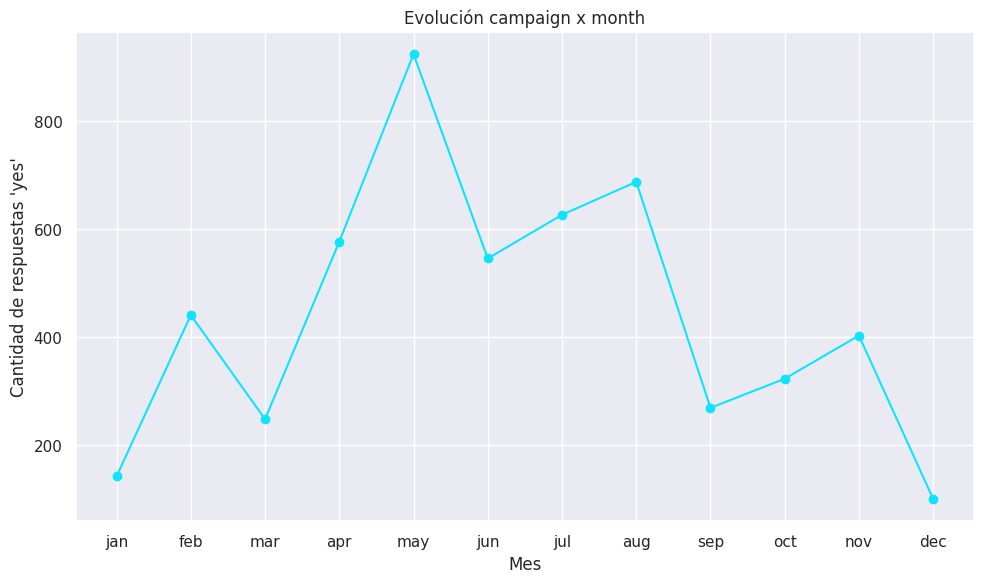

In [17]:
meses_ordenados = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                   'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#Asegurarse de que la columna 'month' tenga el orden de arriba (ya que al no haber sido pasada a date, tiene que ser ordenada manualmente)
df['month'] = pd.Categorical(df['month'], categories=meses_ordenados, ordered=True)

#Filtrar solo los que dijeron "yes"
df_yes = df[df['y'] == 'yes']

#Agrupamos por mes y contamos cuántos "yes" tenemos
meses_data = df_yes['month'].value_counts().sort_index()

#Gráfico de lineas para visualizar la evolución completa a lo largo del período analizado en el dataframe
plt.figure(figsize=(10, 6))
plt.plot(meses_data.index, meses_data.values, color='#0fe3ff', marker='o', linestyle='-')
plt.title("Evolución campaign x month")
plt.xlabel("Mes")
plt.ylabel("Cantidad de respuestas 'yes'")
plt.grid(True)
plt.tight_layout()
plt.show()

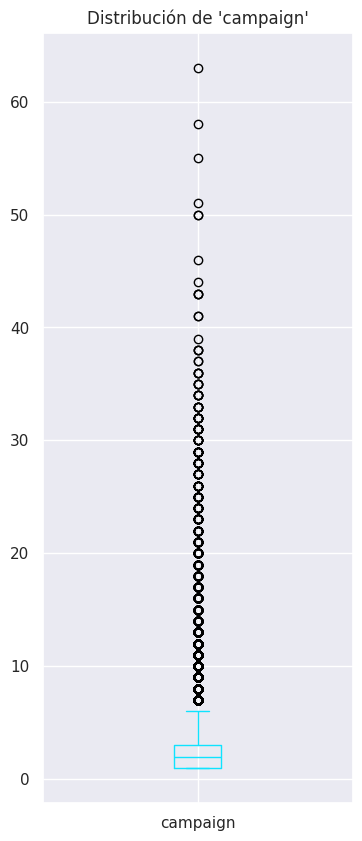

In [18]:
#Este boxplot demuestra que la mayoría se encuentran entre 1-3 llamadas, sin embargo, considero que el equipo de marketing contactó muchas veces a algunos pocos clientes, lo cual puede ser ineficiente o molesto.
#Esto a la par de generar esa molestia en el cliente que lo derive a no querer suscribrise, genera esta incosistencia en el boxplot que desvía por completo la armonía del gráfico, distorsionando así los promedios.

plt.figure(figsize=(4, 10))
df['campaign'].plot(kind='box', color='#0fe3ff')
plt.title("Distribución de 'campaign'")
plt.show()

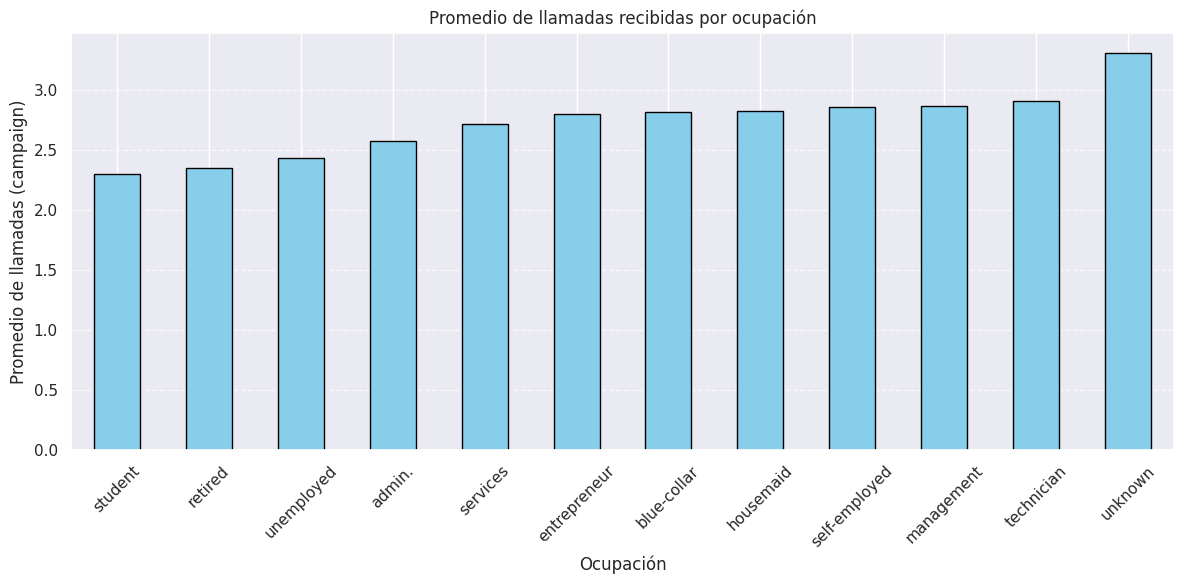

In [19]:
#En este gráfico se ve que la barra más grande, "unknown", indica que el promedio de llamadas recibidas es para personas las cuales se desconocen o no quieren revelar sus ocupaciones.
#Estudiantes, jubilados y desempleados, es lógico que tengan el promedio más bajo, ya que tambien tienen un balance muy bajo
avg_calls_per_job = df.groupby('job')['campaign'].mean().sort_values()

# Creación del gráfico de barras
plt.figure(figsize=(12, 6))
avg_calls_per_job.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Promedio de llamadas recibidas por ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Promedio de llamadas (campaign)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

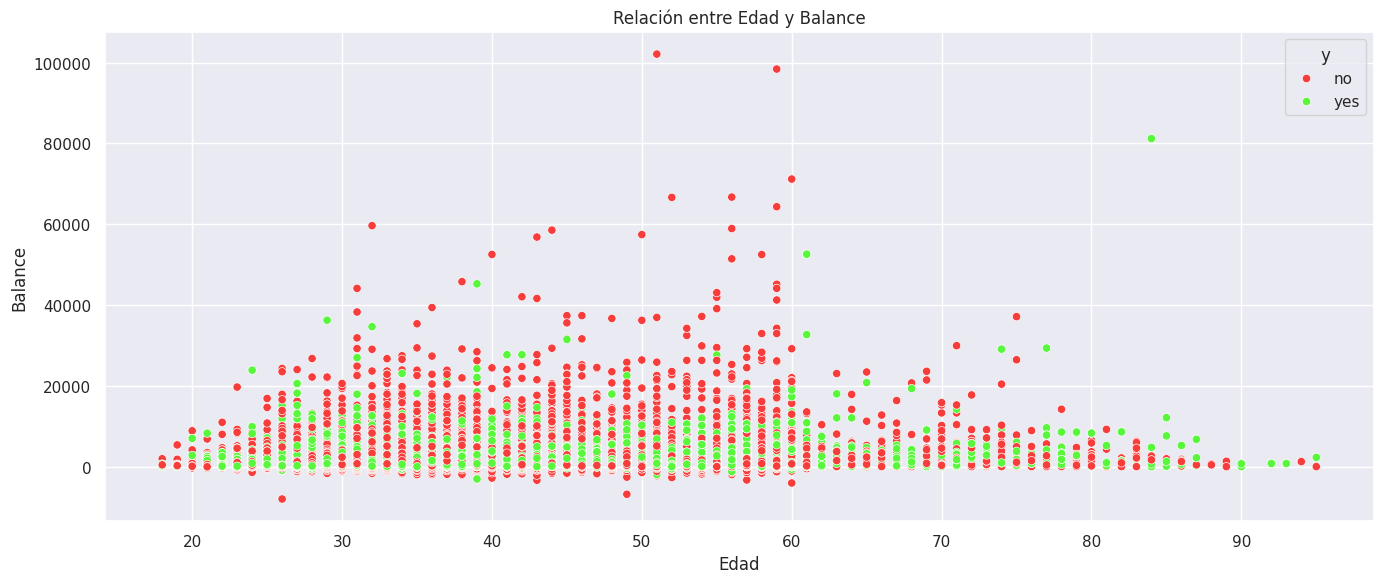

In [20]:
#Este gráfico permite ver que hay algunas personas que tienen un balance muy alto sin embargo eso no significa que vayan a suscribirse.
#También se observa que las edades entre 40-50, son las que marcan más presencia en el gráfico.
#Sin embargo, no saltan a la vista patrones ni tendencias claras

#Gráfico de dispersión
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='y', palette={'yes': '#58f73c', 'no': '#f73c3c'})
plt.title('Relación entre Edad y Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

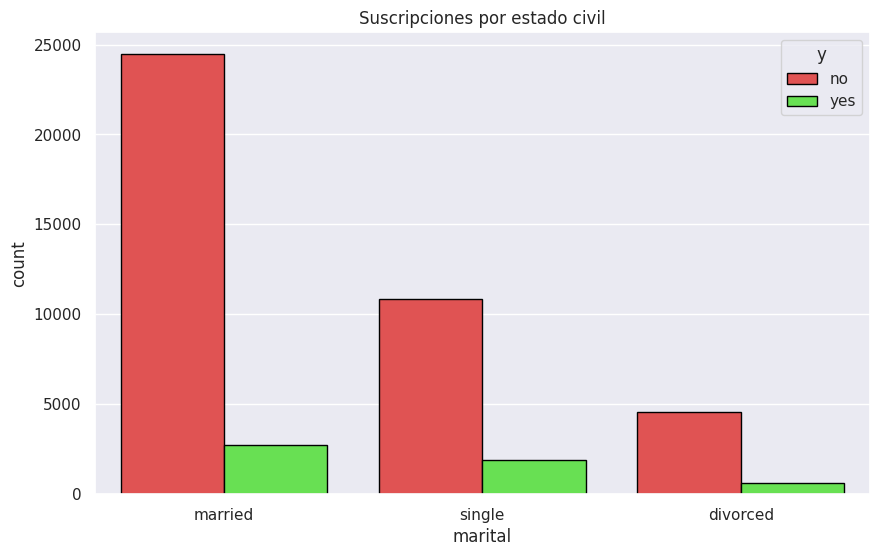

In [21]:
#En este gráfico se ve claramente que el estatus de casado tiene tanto la mayor cantidad de "no" como "yes", la transición a soltero y divorciado también es gradual.
#De todas forma esto no demuestra que las personas que se encuentren casadas tienen tanto la mayor chance de suscribirse como de no suscribirse.
#Lo que sí se puede decir es que hay más personas casadas tanto entre los que se suscribieron como entre los que no se suscribieron.

#Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', edgecolor='black', hue='y', dodge=True, palette={'yes': '#58f73c', 'no': '#f73c3c'})
plt.title('Suscripciones por estado civil')
plt.show()

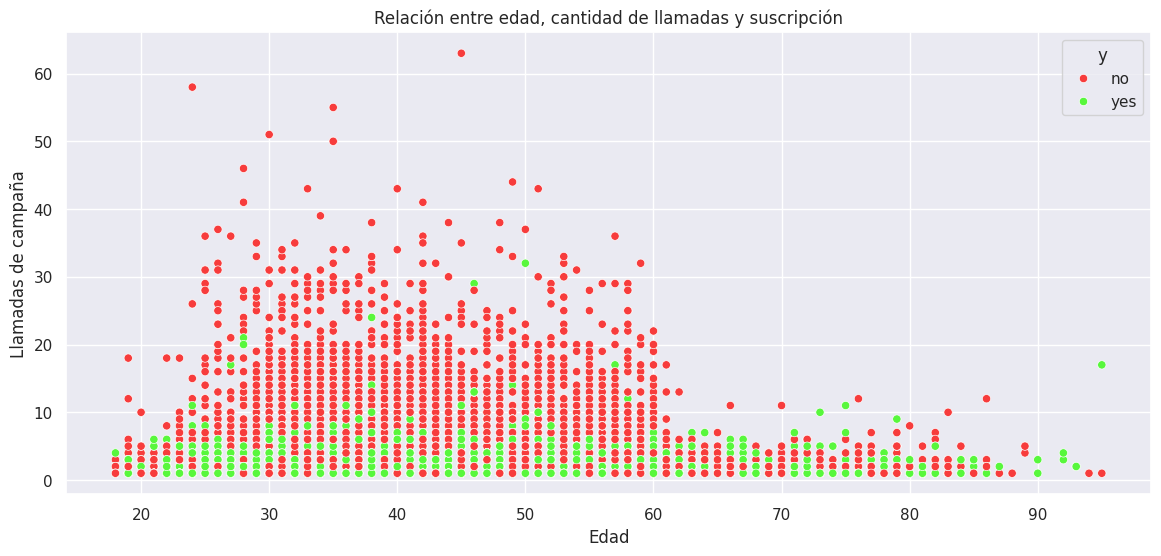

In [22]:
#En este gráfico se visualiza más fácil que la mayoría de llamadas están entre 1-10, ya que ahí están concentrados la mayor cantidad de burbujas/puntos del gráfico.
#Esto a su vez demuestra que de 20-30 aumenta, hay como una pendiente hacia arriba, que se mantiene estable hasta los 60.
#Las edades entre 30-40 son las que más outliers tienen, a la vez del que más burbujas tiene de 0-20. Por otro lado, el rango entre 20-30 años tiene muchos outliers, pero no es tan consistente en el rango 0-20.

#Gráfico de dispersión
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='age', y='campaign', hue='y', palette={'yes': '#58f73c', 'no': '#f73c3c'})

plt.title('Relación entre edad, cantidad de llamadas y suscripción')
plt.xlabel('Edad')
plt.ylabel('Llamadas de campaña')
plt.grid(True)
plt.show()

# **Feature selection**
Como fue mencionado más arriba, se **eliminará** la columna **"duration"** para más adelante tener un modelo predictivo realista, o al menos, lo más cercano a realista posible. Y, aclaración, la **variable objetivo "Y", se esconderá** para cuando deba de hacerse el entrenamiento del modelo.

Las demás columnas se consideran útiles para la identificación de patrones y tendencias que debe hallar el modelado predictivo.

In [23]:
#Importamos más librerías
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import gdown
import time
from scipy.stats import skew

In [24]:
#Importamos los modelos a utilizar
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
#Aclaración, hago una copia del dataframe original, para que no arruine las visualizaciones previas. Y la nueva copia va a estar encodeada.
df_encoded=df.copy()

In [26]:
#Borramos lo mencionado en la feature selection (aparece con error ahora, porque sin querer la ejecute devuelta, y ya no está más la columna duration, entonces va a devolver error constantemente)
df_encoded=df_encoded.drop("duration", axis=1)

In [27]:
#Definir columnas para OneHotEncoder (variables categoricas/nominales)
col_categ = ["job", "marital", "education", "contact", "month", "poutcome"]

#Aplicar OneHotEncoder a todas las variables mencionadas anteriormente
ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded_nominal = ohe.fit_transform(df_encoded[col_categ])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(col_categ))

#Variables binarias (default, loan, housing) con LabelEncoder
binary_cols = ["default", "loan", "housing"]
le = LabelEncoder()
for col in binary_cols:
    df_encoded[f"{col}_encoded"] = le.fit_transform(df_encoded[col])

#Combinar todo y eliminar columnas originales
df_encoded = pd.concat([
    df_encoded.drop(col_categ + binary_cols, axis=1),  # Eliminar originales
    encoded_nominal_df,  # Columnas OneHot
    df_encoded[[f"{col}_encoded" for col in binary_cols]]  # Columnas binarias codificadas
], axis=1)

#Codificar la target 'y' (si no está hecha)
df_encoded["y"] = le.fit_transform(df_encoded["y"])

In [28]:
df_encoded.head()

,age,balance,day,campaign,pdays,previous,y,default_encoded,loan_encoded,housing_encoded,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_encoded,loan_encoded,housing_encoded
0,58,2143,5,1,-1,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
1,44,29,5,1,-1,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
2,33,2,5,1,-1,0,0,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
3,47,1506,5,1,-1,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0


# **Modelado**

In [29]:
#Eliminamos la target
X = df_encoded.drop(columns=['y'])

#La target ahora pasa a ser
y = df_encoded['y']

#Realizamos un split a 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (31647, 44)
Tamaño de X_test: (13564, 44)
Tamaño de y_train: (31647,)
Tamaño de y_test: (13564,)


In [30]:
#Casi se me pasa por alto el escalado.
#Identificamos columnas numéricas (excluyendo las que ya fueron codificadas)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

#Aplicamos MinMaxScaler (solo en numéricas)
scaler = MinMaxScaler()

#Escalamos X_train y X_test con el mismo scaler
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [31]:
#Verificar
print("X_train escalado (primeras filas):\n", X_train[numeric_cols].head())
print("\nX_test escalado (primeras filas):\n", X_test[numeric_cols].head())

X_train escalado (primeras filas):
             age   balance       day  campaign     pdays  previous  \
10747  0.233766  0.077762  0.533333  0.048387  0.000000  0.000000   
26054  0.493506  0.079988  0.600000  0.032258  0.000000  0.000000   
9125   0.363636  0.077762  0.133333  0.016129  0.000000  0.000000   
41659  0.298701  0.116671  0.000000  0.000000  0.137615  0.018182   
4443   0.259740  0.077762  0.633333  0.000000  0.000000  0.000000   

       default_encoded  default_encoded  loan_encoded  loan_encoded  ...  \
10747              0.0              0.0           0.0           0.0  ...   
26054              0.0              0.0           0.0           0.0  ...   
9125               0.0              0.0           0.0           0.0  ...   
41659              0.0              0.0           0.0           0.0  ...   
4443               0.0              0.0           0.0           0.0  ...   

       month_sep  poutcome_other  poutcome_success  poutcome_unknown  \
10747        0.0    


--- Entrenando Árbol de Decisión ---


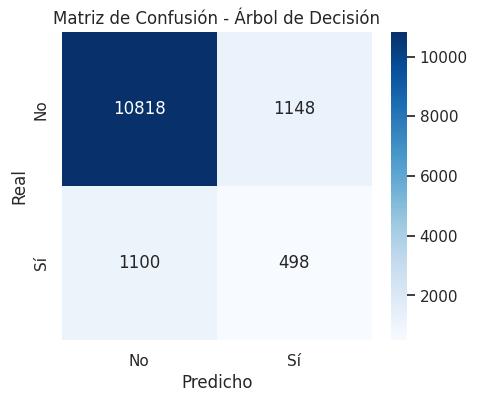


--- Entrenando KNN ---


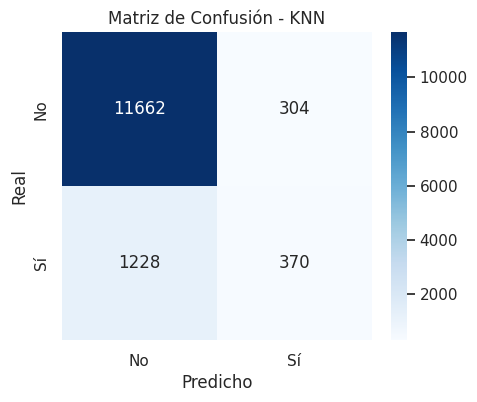


--- Entrenando Regresión Logística ---


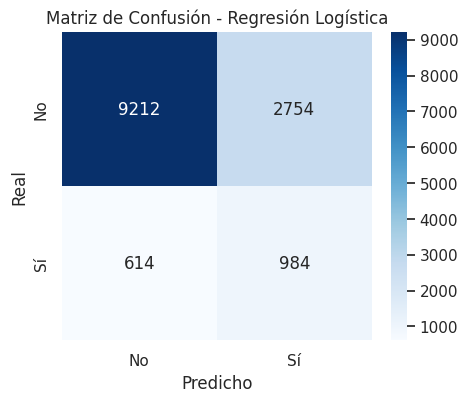


--- Resumen de Métricas ---
                     accuracy  precision    recall        f1  train_time  \
Árbol de Decisión    0.834267   0.302552  0.311640  0.307028    1.000385   
KNN                  0.887054   0.548961  0.231539  0.325704    0.081744   
Regresión Logística  0.751696   0.263242  0.615770  0.368816    1.366076   

                      roc_auc  
Árbol de Decisión    0.607851  
KNN                  0.699110  
Regresión Logística  0.761576  


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# Modelos a evaluar
models = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Regresión Logística": LogisticRegression(random_state=42, class_weight='balanced')
}

# Diccionario para almacenar resultados
results = {}

for name, model in models.items():
    print(f"\n--- Entrenando {name} ---")

    # 1. Entrenamiento y medición de tiempo
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # 2. Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # 3. Cálculo de métricas
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "train_time": train_time
    }

    if y_proba is not None:
        metrics["roc_auc"] = roc_auc_score(y_test, y_proba)

    results[name] = metrics

    # 4. Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# 5. Mostrar resultados en DataFrame
results_df = pd.DataFrame(results).T
print("\n--- Resumen de Métricas ---")
print(results_df)

# **Conclusiones**

**Acurracy:** A pesar de ser "la mejor" métrica, no predice correctamente la clase minoritaria, que es el "Sí".

**Precision:** Es bastante engañosa, porque la los positivos falsos, son 3 veces la cantidad de los positivos verdaderos. Y si predice que es positivo, pero en realidad no lo es, no termina siendo muy útil. Salvo en el caso de KNN, que está dentro del todo balanceado.

**Recall:** Considero que esta métrica es la que mejor indica que tan acertados son estos modelos. Ya que prioriza la clase minoritaria (el Sí), destacando el rendimiento de la regresión logística, aunque sigue sin ser una métrica muy positiva y alentadora.

**F1_score:** Esta métrica, prueba mi punto anterior, que el modelo no es el mejor, un promedio aproximado entre los 3 modelos, debe ser de 0.33, y como se sabe, mientras más cercano sea el valor a 1 significa que mejor es el equilibrio entre precisión y recall. Y 0.33 tiende más para el lado de cero, no llega a ser tan pésimo como un 0.20 de todas formas.

**Train_time:** El módelo más rápido fue regresión logística, y el más lento, KNN.

**Roc_auc:** El mejor modelo es regresión logística. Teniendo en cuenta que el 0.5 es azar, y el 1 perfección (cosa que es imposible, ya que si uno tira una moneda al aire, nunca acierta con un 100% de precisión de que lado va a caer), la regresión logística, está dentro del todo bien, en el punto medio, y los demás modelos implican que se deben de hacer ajustes.

# **Sugerencias**

Recaudar más datos para tener una mayor cantidad de datos de la clase minoritaría y así poder encontrar más patrones que ayuden al modelo a ser entrenado y progresar. Esto como efecto secundario tiene reducir el gran desbalance de clases que hay. Y hablando de overfitting/sobre ajuste, que está ligado al desbalance mencionado anteriormente, realizar una validación cruzada, podría ayudar a ajustar el sobre ajuste y que el modelo realmente sirva. Y por último, recomendaría utilizar algún modelo similar a la regresión logística, o modelos populares como xgboost o random forest classifier o lightGBM.